<a href="https://colab.research.google.com/github/rosianaoksela/Tugas-Akhir-Komputasi-Awan/blob/main/Tugas_Project_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.datasets import make_classification

In [ ]:
# 1. Memuat Data dan Data Snapshot
data_df = pd.read_csv('Credit Card Churn-Dataset.csv')
data_df.head()

,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,...,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
0,719455083,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,...,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,773503308,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,...,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,715452408,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,...,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,711264033,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,...,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,...,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


In [ ]:
# Menampilkan 50 baris secara acak
data_df.sample(n=50)

,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,...,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
658,709932558,0,39,F,2,Uneducated,Married,Less than $40K,Blue,26,...,3,2,3471.0,2517,954.0,0.743,1771,34,0.889,0.725
2939,709688883,1,45,M,3,High School,Unknown,$80K - $120K,Blue,36,...,3,2,3845.0,0,3845.0,0.595,2174,39,0.393,0.000
1698,714714558,0,37,F,2,Uneducated,Single,$40K - $60K,Blue,27,...,3,2,3050.0,2517,533.0,1.177,4698,75,0.923,0.825
2734,721315233,0,47,M,4,High School,Single,$40K - $60K,Silver,32,...,3,4,18535.0,1192,17343.0,0.646,3780,70,0.667,0.064
3814,718967433,0,34,F,2,High School,Divorced,Less than $40K,Blue,36,...,6,3,2426.0,0,2426.0,0.888,4918,81,0.800,0.000
3668,794579658,0,47,M,3,High School,Married,$80K - $120K,Blue,32,...,2,2,23424.0,2517,20907.0,0.762,3537,73,0.738,0.107
4609,708596283,0,35,F,3,Uneducated,Single,Less than $40K,Blue,23,...,2,2,2858.0,1251,1607.0,0.576,2844,73,0.622,0.438
1167,713847858,1,49,F,3,Graduate,Divorced,Less than $40K,Blue,36,...,3,3,1438.3,0,1438.3,0.409,1849,43,0.536,0.000
898,715629783,0,51,M,1,Graduate,Married,$40K - $60K,Silver,36,...,2,2,17905.0,980,16925.0,0.731,4399,64,0.778,0.055
4903,709579383,0,58,M,1,Uneducated,Married,$80K - $120K,Blue,50,...,3,2,6978.0,1148,5830.0,1.645,1362,26,1.000,0.165


In [ ]:
# 2. Data Description
print("\nData Description:")
data_df.describe()


Data Description:


,client_id,label,usia,jumlah_tanggungan,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
count,5.000000e+03,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.390590e+08,0.160000,46.38880,2.36100,35.913000,3.83380,2.335400,2.464800,8637.409280,1171.823200,7465.586080,0.758146,4347.268800,64.434600,0.711494,0.277980
std,3.679612e+07,0.366643,8.03182,1.31203,7.922751,1.55263,1.004146,1.101546,9112.079042,814.875378,9116.649832,0.220429,3343.231144,23.164582,0.241518,0.277661
min,7.080846e+08,0.000000,26.00000,0.00000,13.000000,1.00000,0.000000,0.000000,1438.300000,0.000000,14.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130287e+08,0.000000,41.00000,1.00000,31.000000,3.00000,2.000000,2.000000,2571.750000,475.500000,1297.750000,0.629000,2132.750000,45.000000,0.578000,0.026000
50%,7.179772e+08,0.000000,46.00000,2.00000,36.000000,4.00000,2.000000,2.000000,4566.500000,1279.000000,3423.500000,0.735000,3889.000000,67.000000,0.700000,0.181000
75%,7.728630e+08,0.000000,52.00000,3.00000,40.000000,5.00000,3.000000,3.000000,11003.000000,1792.000000,9836.250000,0.859000,4747.000000,80.000000,0.816000,0.511000
max,8.282989e+08,1.000000,73.00000,5.00000,56.000000,6.00000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,131.000000,3.571000,0.994000


In [ ]:
# 3. Memeriksa missing values
print("\nMissing Values:")
total = data_df.isnull().sum().sort_values(ascending=False)
percent = (data_df.isnull().sum() / data_df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

# Mengisi missing values (jika ada)
data_df = data_df.ffill()



Missing Values:
                              Total  Percent
client_id                         0      0.0
bulan_nonactive                   0      0.0
rasio_jumlah_transaksi_Q4_Q1      0      0.0
jumlah_transaksi                  0      0.0
total_transaksi                   0      0.0
rasio_transaksi_Q4_Q1             0      0.0
sisa_limit_kredit                 0      0.0
total_limit_kredit_dipakai        0      0.0
total_limit_kredit                0      0.0
jumlah_kontak                     0      0.0
jumlah_produk                     0      0.0
label                             0      0.0
lama_nasabah                      0      0.0
tipe_kartu_kredit                 0      0.0
penghasilan_tahunan               0      0.0
status_nikah                      0      0.0
pendidikan                        0      0.0
jumlah_tanggungan                 0      0.0
gender                            0      0.0
usia                              0      0.0
rasio_pemakaian                   0   


EDA - Label Distribution:


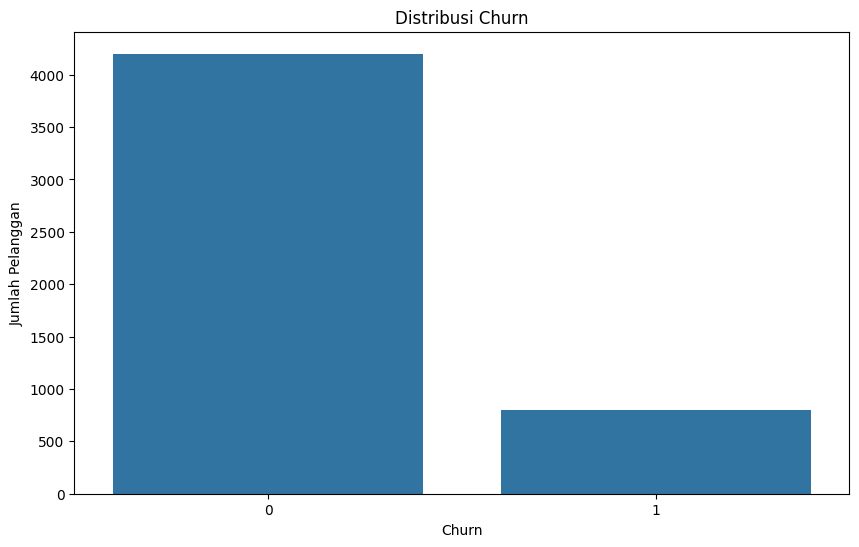

In [ ]:
# 4. EDA - Exploratory Data Analysis
# EDA - Label Distribution
print("\nEDA - Label Distribution:")
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data_df)
plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Jumlah Pelanggan')
plt.show()


EDA - Correlation Matrix:


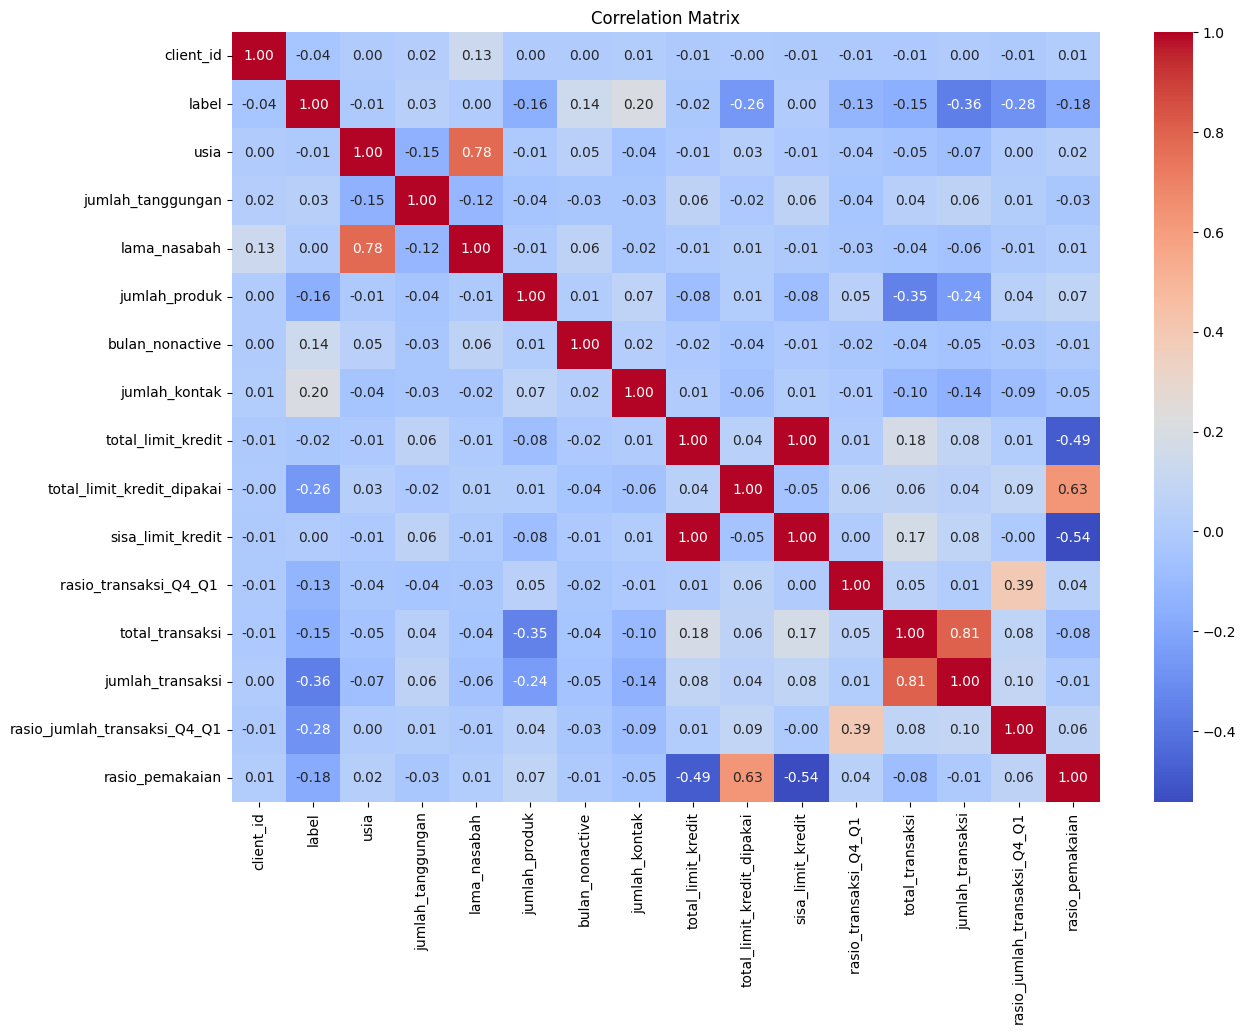

In [ ]:
# EDA - Correlation Matrix
# Assuming data_df is your DataFrame
# Exclude non-numeric columns
numeric_df = data_df.select_dtypes(include=[float, int])
print("\nEDA - Correlation Matrix:")
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

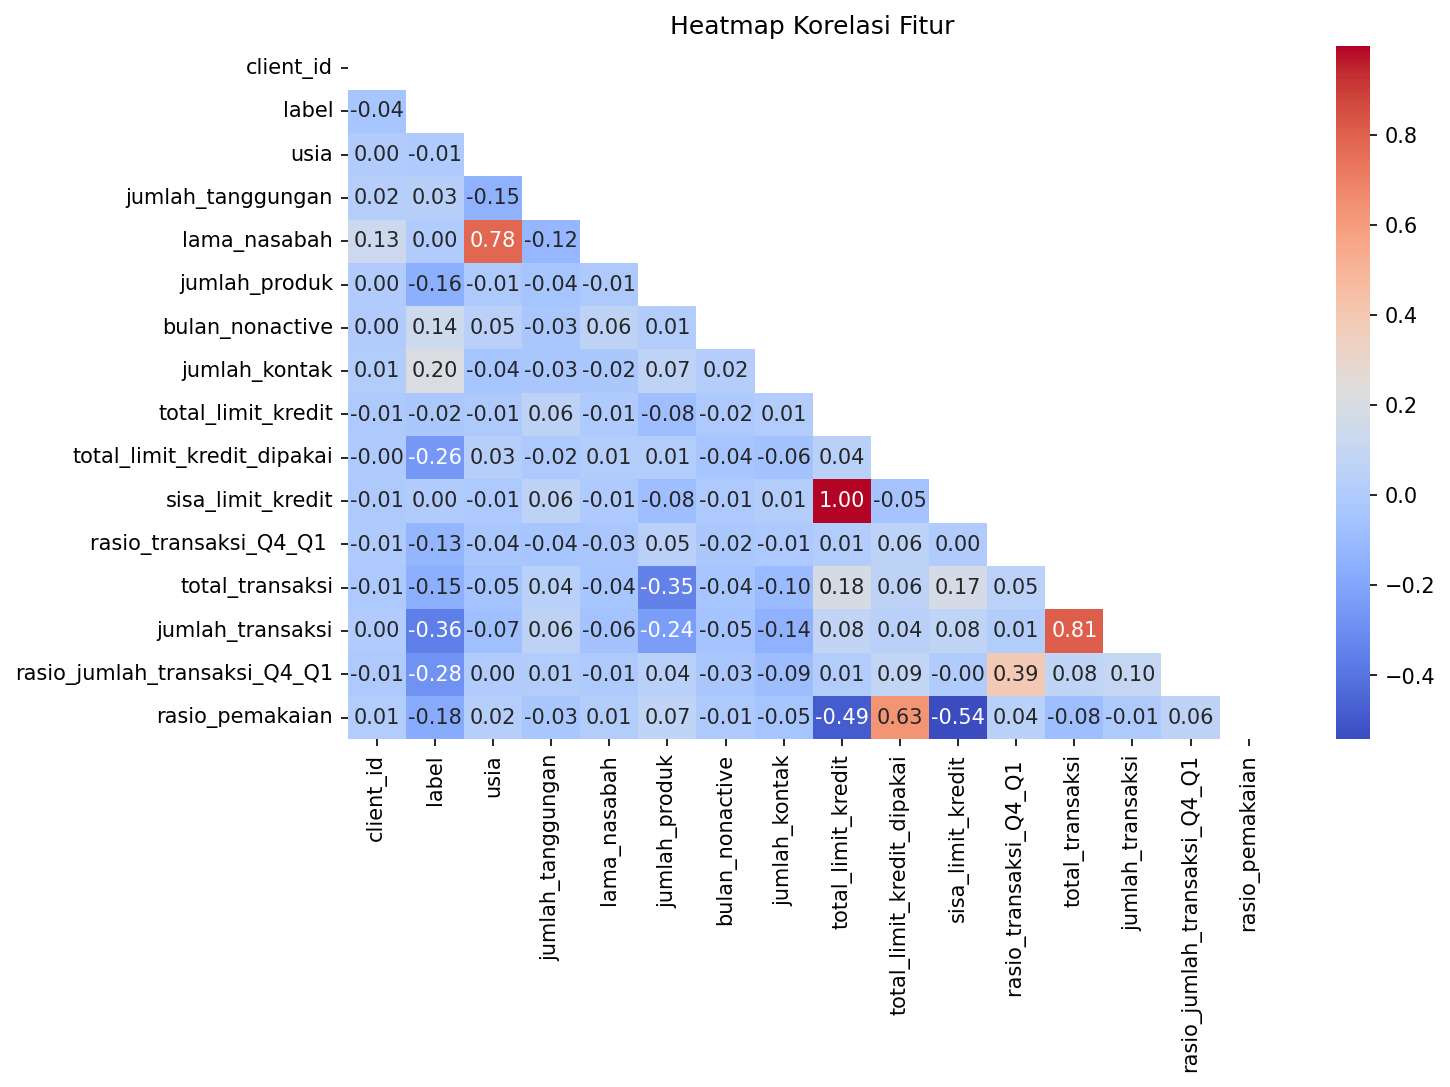

In [ ]:
# Membuat mask untuk segitiga atas
corr = data_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Membuat heatmap
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [ ]:
# 5. Pisahkan Fitur dan Target
X = data_df.drop(columns=['client_id', 'label'])  # Exclude 'client_id' and 'label' columns
y = data_df['label']

categorical_cols = ['gender', 'pendidikan', 'status_nikah', 'penghasilan_tahunan', 'tipe_kartu_kredit']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [ ]:
# 6. Feature Importance Menggunakan Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print('Feature Importance:')
print(feature_importance_df)


Feature Importance:
                               Feature  Importance
10                     total_transaksi    0.168808
11                    jumlah_transaksi    0.158610
12        rasio_jumlah_transaksi_Q4_Q1    0.099562
7           total_limit_kredit_dipakai    0.099051
9               rasio_transaksi_Q4_Q1     0.069438
13                     rasio_pemakaian    0.063636
3                        jumlah_produk    0.061432
8                    sisa_limit_kredit    0.040352
6                   total_limit_kredit    0.036558
5                        jumlah_kontak    0.032275
0                                 usia    0.032088
2                         lama_nasabah    0.027696
4                      bulan_nonactive    0.025980
1                    jumlah_tanggungan    0.016327
14                            gender_M    0.009053
21                status_nikah_Married    0.007762
22                 status_nikah_Single    0.005648
27  penghasilan_tahunan_Less than $40K    0.005222
16         

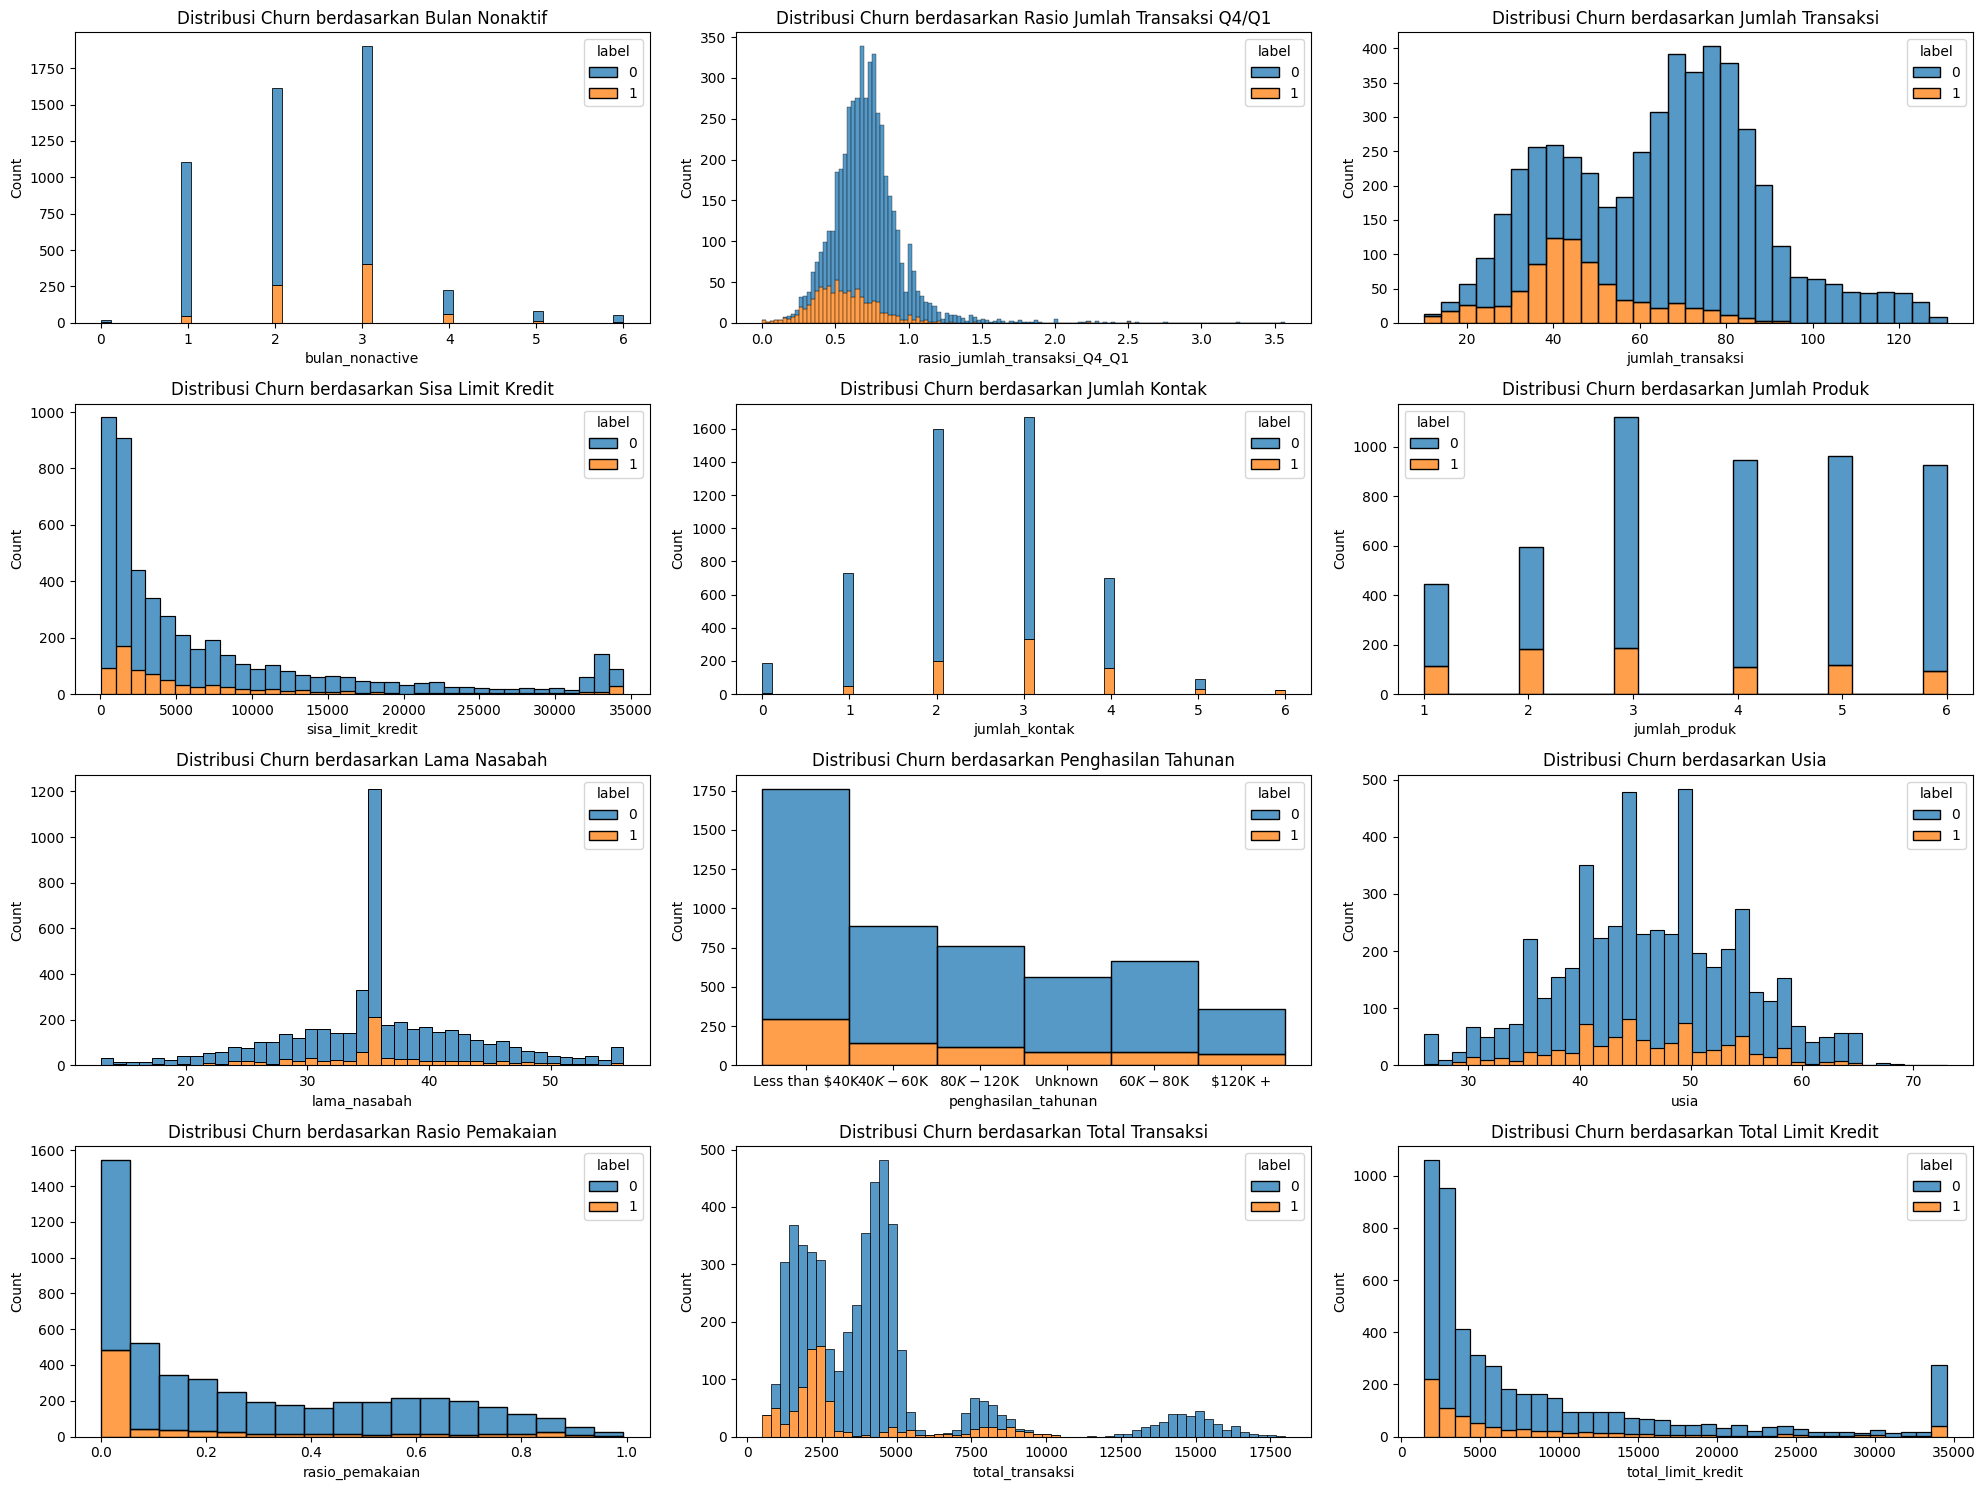

In [ ]:
# 7. Visualisasi Distribusi Churn Berdasarkan Fitur
fig, axes = plt.subplots(4, 3, figsize=(20, 15))

# Plot untuk variabel 'bulan_nonactive'
sns.histplot(data=data_df, x='bulan_nonactive', hue='label', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Churn berdasarkan Bulan Nonaktif')

# Plot untuk variabel 'rasio_jumlah_transaksi_Q4_Q1'
sns.histplot(data=data_df, x='rasio_jumlah_transaksi_Q4_Q1', hue='label', multiple='stack', ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Churn berdasarkan Rasio Jumlah Transaksi Q4/Q1')

# Plot untuk variabel 'jumlah_transaksi'
sns.histplot(data=data_df, x='jumlah_transaksi', hue='label', multiple='stack', ax=axes[0, 2])
axes[0, 2].set_title('Distribusi Churn berdasarkan Jumlah Transaksi')

# Plot untuk variabel 'sisa_limit_kredit'
sns.histplot(data=data_df, x='sisa_limit_kredit', hue='label', multiple='stack', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Churn berdasarkan Sisa Limit Kredit')

# Plot untuk variabel 'jumlah_kontak'
sns.histplot(data=data_df, x='jumlah_kontak', hue='label', multiple='stack', ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Churn berdasarkan Jumlah Kontak')

# Plot untuk variabel 'jumlah_produk'
sns.histplot(data=data_df, x='jumlah_produk', hue='label', multiple='stack', ax=axes[1, 2])
axes[1, 2].set_title('Distribusi Churn berdasarkan Jumlah Produk')

# Plot untuk variabel 'lama_nasabah'
sns.histplot(data=data_df, x='lama_nasabah', hue='label', multiple='stack', ax=axes[2, 0])
axes[2, 0].set_title('Distribusi Churn berdasarkan Lama Nasabah')

# Plot untuk variabel 'penghasilan_tahunan'
sns.histplot(data=data_df, x='penghasilan_tahunan', hue='label', multiple='stack', ax=axes[2, 1])
axes[2, 1].set_title('Distribusi Churn berdasarkan Penghasilan Tahunan')

# Plot untuk variabel 'usia'
sns.histplot(data=data_df, x='usia', hue='label', multiple='stack', ax=axes[2, 2])
axes[2, 2].set_title('Distribusi Churn berdasarkan Usia')

# Plot untuk variabel 'rasio_pemakaian'
sns.histplot(data=data_df, x='rasio_pemakaian', hue='label', multiple='stack', ax=axes[3, 0])
axes[3, 0].set_title('Distribusi Churn berdasarkan Rasio Pemakaian')

# Plot untuk variabel 'total_transaksi'
sns.histplot(data=data_df, x='total_transaksi', hue='label', multiple='stack', ax=axes[3, 1])
axes[3, 1].set_title('Distribusi Churn berdasarkan Total Transaksi')

# Plot untuk variabel 'total_limit_kredit'
sns.histplot(data=data_df, x='total_limit_kredit', hue='label', multiple='stack', ax=axes[3, 2])
axes[3, 2].set_title('Distribusi Churn berdasarkan Total Limit Kredit')

plt.tight_layout()
plt.show()

In [ ]:
# Load dataset
data_df = pd.read_csv('Credit Card Churn-Dataset.csv')

# Encoding variabel kategorikal
label_encoder = LabelEncoder()
data_df['gender'] = label_encoder.fit_transform(data_df['gender'])
data_df['pendidikan'] = label_encoder.fit_transform(data_df['pendidikan'])
data_df['status_nikah'] = label_encoder.fit_transform(data_df['status_nikah'])
data_df['penghasilan_tahunan'] = label_encoder.fit_transform(data_df['penghasilan_tahunan'])
data_df['tipe_kartu_kredit'] = label_encoder.fit_transform(data_df['tipe_kartu_kredit'])

# Memisahkan fitur dan target
X = data_df.drop(columns=['label', 'client_id'])
y = data_df['label']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model yang akan digunakan
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Training dan evaluasi model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.2f}")
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"\n{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)


Training Random Forest...

Random Forest Accuracy: 0.97

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       851
           1       0.98      0.80      0.88       149

    accuracy                           0.97      1000
   macro avg       0.97      0.90      0.93      1000
weighted avg       0.97      0.97      0.97      1000


Random Forest Confusion Matrix:
[[848   3]
 [ 30 119]]
Training Logistic Regression...

Logistic Regression Accuracy: 0.90

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       851
           1       0.74      0.52      0.61       149

    accuracy                           0.90      1000
   macro avg       0.83      0.75      0.78      1000
weighted avg       0.89      0.90      0.89      1000


Logistic Regression Confusion Matrix:
[[824  27]
 [ 71  78]]
Training Support Vecto